# Lagrange Interpolation

In [1]:
using SemiLagrangian
using Plots
using Test

In [42]:
order = 5 
lag = Lagrange(order, Float64)

Lagrange{Float64, SemiLagrangian.CircEdge, 5}

In [43]:
f(x) = (x+2) * (3x+2) * (2x-1) * (x - 2) * (3x+1)

f (generic function with 1 method)

In [44]:
xi = LinRange(-2, 2, 20)
fi = Float64[]
for x in xi
    res = sum(lag.tabfct[j+1](x) * f(j - order ÷ 2) for j = 0:order)
    push!(fi, res)
end

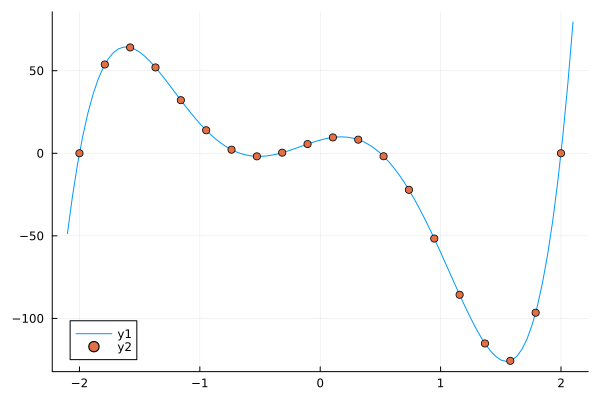

In [45]:
plot( f, LinRange(-2.1, 2.1, 100))
scatter!(xi, fi)

In [24]:
g(x, y) = f(x) * f(y)

g (generic function with 1 method)

In [25]:
order = 3
lag = Lagrange(order, Float64)
nx, ny = 100, 100
xi = LinRange(-4, 4, nx)
yi = LinRange(-4, 4, ny)
gi = zeros(nx, ny)

for i in eachindex(xi), j in eachindex(yi)
    dec = order ÷ 2
    res = 0.0
    for l = 0:order, k = 0:order
        res += lag.tabfct[l+1](xi[i]) * lag.tabfct[k+1](yi[j]) * g(l - dec, k - dec)
    end
    gi[i, j] = res
    
end


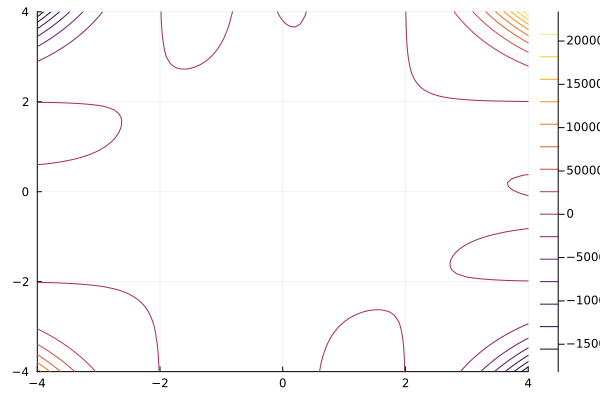

In [26]:
contour(xi, yi, g)

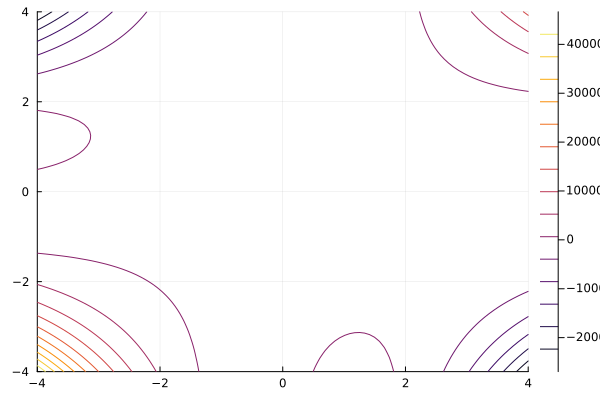

In [27]:
contour(xi, yi, gi)